<a href="https://colab.research.google.com/github/daffaidf/Desain-Analisis-Algoritma/blob/main/Pertemuan14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== HASIL ANALISIS FRAUD: LATIHAN 1 (Slide 152) ===
Node  | Status | Degree   | Tetangga F | Probabilitas Fraud (P)
-----------------------------------------------------------------
1     | F      | 2        | 1          | 0.50 (50%)
2     | NF     | 3        | 1          | 0.33 (33%)
3     | NF     | 3        | 1          | 0.33 (33%)
4     | F      | 1        | 0          | 0.00 (0%)
5     | F      | 1        | 0          | 0.00 (0%)
6     | NF     | 4        | 2          | 0.50 (50%)
7     | F      | 4        | 2          | 0.50 (50%)
8     | NF     | 2        | 1          | 0.50 (50%)
9     | NF     | 1        | 0          | 0.00 (0%)
10    | F      | 1        | 1          | 1.00 (100%)

[INFO] Menampilkan visualisasi graf...


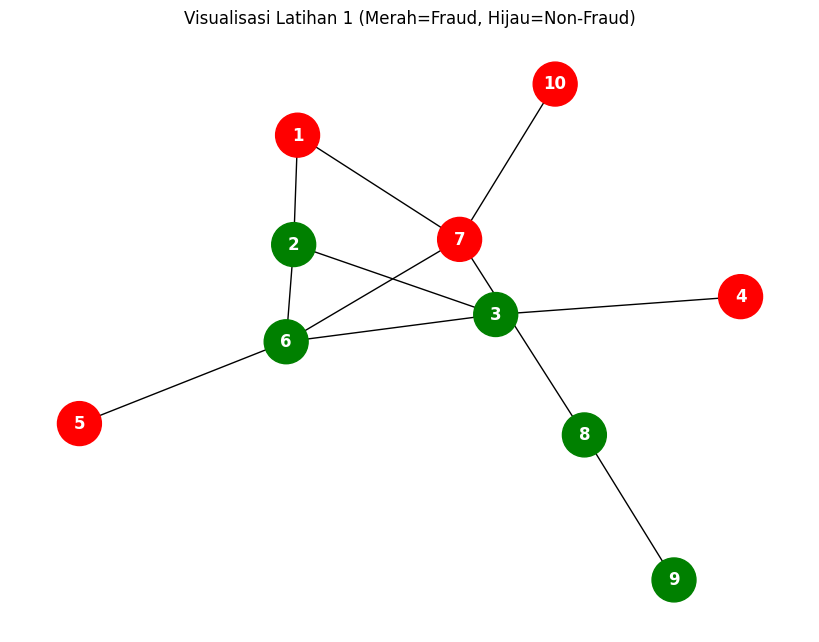

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def main_latihan_1():
    print("=== HASIL ANALISIS FRAUD: LATIHAN 1 (Slide 152) ===")

    # 1. Definisi Data (Vertices & Edges sesuai Gambar Latihan 1)
    # F = Fraud, NF = Non-Fraud
    fraud_nodes = [1, 4, 5, 7, 10]
    non_fraud_nodes = [2, 3, 6, 8, 9]

    # Mendefinisikan hubungan (garis) antar node
    edges = [
        (1, 2), (1, 7),
        (2, 3), (2, 6),
        (3, 4), (3, 6),
        (6, 5), (6, 7),
        (7, 8), (7, 10),
        (8, 9)
    ]

    # 2. Membangun Graph
    G = nx.Graph()
    G.add_nodes_from(fraud_nodes, status='F')
    G.add_nodes_from(non_fraud_nodes, status='NF')
    G.add_edges_from(edges)

    # 3. Perhitungan Probabilitas Fraud P(F|q)
    # Rumus: Jumlah Tetangga Fraud / Total Degree
    print(f"{'Node':<5} | {'Status':<6} | {'Degree':<8} | {'Tetangga F':<10} | {'Probabilitas Fraud (P)'}")
    print("-" * 65)

    posisi_node = {} # Menyimpan skor untuk visualisasi nanti

    for node in sorted(G.nodes()):
        neighbors = list(G.neighbors(node))
        degree = len(neighbors)

        fraud_neighbors = 0
        for n in neighbors:
            if G.nodes[n]['status'] == 'F':
                fraud_neighbors += 1

        # Hindari pembagian dengan nol
        probabilitas = fraud_neighbors / degree if degree > 0 else 0.0
        posisi_node[node] = probabilitas

        status = G.nodes[node]['status']
        print(f"{node:<5} | {status:<6} | {degree:<8} | {fraud_neighbors:<10} | {probabilitas:.2f} ({probabilitas*100:.0f}%)")

    # 4. Visualisasi (Opsional - agar mirip slide presentasi)
    print("\n[INFO] Menampilkan visualisasi graf...")
    color_map = []
    for node in G.nodes():
        if G.nodes[node]['status'] == 'F':
            color_map.append('red')
        else:
            color_map.append('green')

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42) # Seed agar posisi konsisten
    nx.draw(G, pos, node_color=color_map, with_labels=True,
            node_size=1000, font_color='white', font_weight='bold')
    plt.title("Visualisasi Latihan 1 (Merah=Fraud, Hijau=Non-Fraud)")
    plt.show()

if __name__ == "__main__":
    main_latihan_1()

=== HASIL ANALISIS FRAUD: LATIHAN 2 (Slide 153) ===
Node  | Status | Degree   | Tetangga F | Probabilitas Fraud (P)
-----------------------------------------------------------------
1     | F      | 2        | 2          | 1.00 (100%)
2     | F      | 3        | 3          | 1.00 (100%)
3     | F      | 6        | 5          | 0.83 (83%)
4     | NF     | 4        | 1          | 0.25 (25%)
5     | NF     | 5        | 0          | 0.00 (0%)
6     | NF     | 3        | 0          | 0.00 (0%)
7     | NF     | 3        | 0          | 0.00 (0%)
8     | NF     | 3        | 0          | 0.00 (0%)
9     | NF     | 3        | 0          | 0.00 (0%)
10    | F      | 2        | 2          | 1.00 (100%)
11    | F      | 3        | 3          | 1.00 (100%)
12    | F      | 4        | 3          | 0.75 (75%)
13    | NF     | 1        | 1          | 1.00 (100%)

[INFO] Menampilkan visualisasi graf...


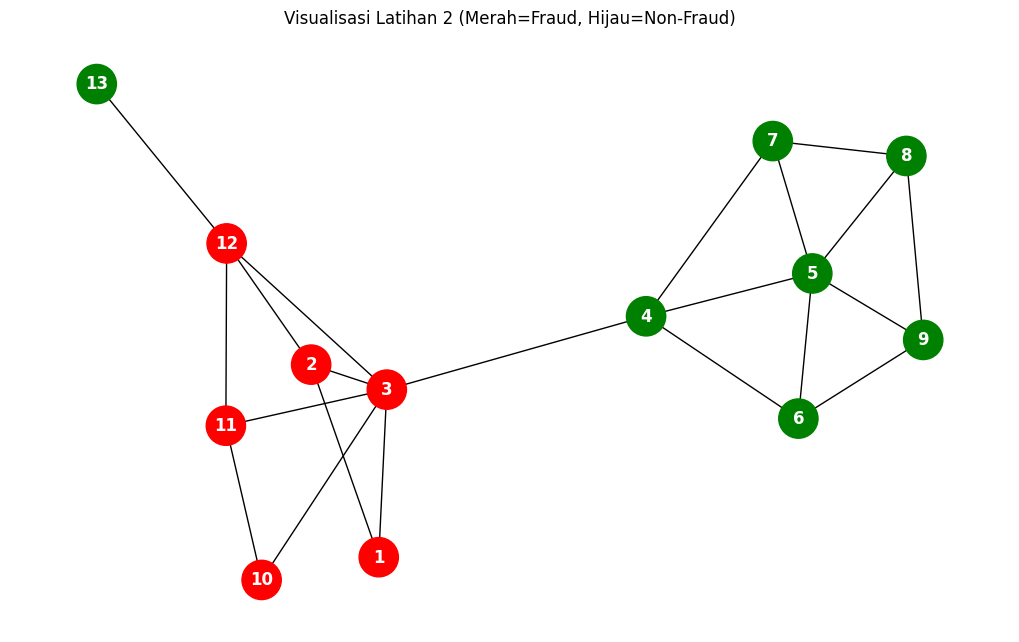

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def main_latihan_2():
    print("=== HASIL ANALISIS FRAUD: LATIHAN 2 (Slide 153) ===")

    # 1. Definisi Data (Vertices & Edges sesuai Gambar Latihan 2)
    # Node 1,2,3,10,11,12 adalah Fraud
    fraud_nodes = [1, 2, 3, 10, 11, 12]
    # Sisanya Non-Fraud
    non_fraud_nodes = [4, 5, 6, 7, 8, 9, 13]

    # Mendefinisikan hubungan (garis) antar node
    edges = [
        (1, 2), (1, 3),
        (2, 3), (2, 12),
        (3, 12), (3, 11), (3, 10), (3, 4), # Node 3 menghubungkan ke Node 4 (jembatan)
        (12, 11), (12, 13),
        (11, 10),
        (4, 6), (4, 5), (4, 7),
        (5, 6), (5, 9), (5, 8), (5, 7),
        (6, 9),
        (7, 8),
        (8, 9),
        (12, 13) # Node 13 terhubung ke 12
    ]

    # 2. Membangun Graph
    G = nx.Graph()
    G.add_nodes_from(fraud_nodes, status='F')
    G.add_nodes_from(non_fraud_nodes, status='NF')
    G.add_edges_from(edges)

    # 3. Perhitungan Probabilitas Fraud P(F|q)
    print(f"{'Node':<5} | {'Status':<6} | {'Degree':<8} | {'Tetangga F':<10} | {'Probabilitas Fraud (P)'}")
    print("-" * 65)

    for node in sorted(G.nodes()):
        neighbors = list(G.neighbors(node))
        degree = len(neighbors)

        fraud_neighbors = 0
        for n in neighbors:
            if G.nodes[n]['status'] == 'F':
                fraud_neighbors += 1

        probabilitas = fraud_neighbors / degree if degree > 0 else 0.0

        status = G.nodes[node]['status']
        print(f"{node:<5} | {status:<6} | {degree:<8} | {fraud_neighbors:<10} | {probabilitas:.2f} ({probabilitas*100:.0f}%)")

    # 4. Visualisasi
    print("\n[INFO] Menampilkan visualisasi graf...")
    color_map = []
    for node in G.nodes():
        if G.nodes[node]['status'] == 'F':
            color_map.append('red')
        else:
            color_map.append('green')

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=10) # Seed diatur agar layout rapi
    nx.draw(G, pos, node_color=color_map, with_labels=True,
            node_size=800, font_color='white', font_weight='bold')
    plt.title("Visualisasi Latihan 2 (Merah=Fraud, Hijau=Non-Fraud)")
    plt.show()

if __name__ == "__main__":
    main_latihan_2()